In [1]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import MiniBatchKMeans

In [489]:
path = "data/images/loss/90"

In [490]:
test_juv = [2576266, 2576275, 2576302, 2576311, 2576334]

In [491]:
juv_win = [2575964, 2575973, 2575985, 2575996, 2576005, 2576014, 2576048, 2576056, 2576062, 2576076, 2576094, 2576105, 2576121, 2576132, 
         2576144, 2576154, 2576163, 2576175, 2576186, 2576195, 2576204, 2576209, 2576225, 2576238, 2576252, 2576266, 2576275, 2576302, 2576311, 2576334]

In [492]:
juv_loss = [2576035,2576295,2576085]

In [493]:
test_milan_win = [2576242,2576304,2576314,2576333]

In [494]:
test_milan_loss = [2576252,2576289]

In [495]:
milanwin = [2575961,2575974,2575993,2576007,2576052,2576078,2576114,2576151,2576164,2576176,2576197,2576206,2576214,2576233]

In [496]:
milanloss = [2575986,2576016,2576024,2576034,2576062,2576083,2576124,2576134]

In [497]:
tenmin = []

In [498]:
for i in range(len(juv_loss)):
    id = str(juv_loss[i]) + ".jpg"
    npath = path  + "/" + id
    print(type(npath))
    img = cv2.imread(npath)
    print(npath)
    tenmin.append(img)

<class 'str'>
data/images/loss/90/2576035.jpg
<class 'str'>
data/images/loss/90/2576295.jpg
<class 'str'>
data/images/loss/90/2576085.jpg


In [499]:
print(tenmin[0])

[[[ 74   0  33]
  [109  10  56]
  [139   0  65]
  ...
  [  4   1 157]
  [ 14   9 132]
  [  0   0  90]]

 [[108  11  55]
  [155  37  90]
  [187  29 100]
  ...
  [ 26  22 195]
  [ 36  29 166]
  [ 10   4 123]]

 [[132   0  55]
  [184  30  95]
  [216  22 105]
  ...
  [ 22  15 220]
  [ 30  21 191]
  [  5   0 146]]

 ...

 [[  2   2 146]
  [ 31  29 189]
  [ 22  19 212]
  ...
  [217  30 102]
  [194  31  92]
  [151   1  55]]

 [[  0   1 111]
  [ 31  33 157]
  [ 25  27 181]
  ...
  [187  40 100]
  [165  40  90]
  [120   7  51]]

 [[  0   0  87]
  [ 26  30 135]
  [ 18  21 155]
  ...
  [154  28  80]
  [139  31  77]
  [ 98   2  42]]]


In [500]:
len(tenmin)

3

In [501]:
tenmin2 = np.array(tenmin)

In [502]:
tenmin2.shape

(3, 400, 400, 3)

In [503]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

NameError: name 'image' is not defined

In [504]:
graytenmin = []

In [505]:
for i in range(len(tenmin)):
    g = cv2.cvtColor(tenmin[i], cv2.COLOR_BGR2GRAY)
    graytenmin.append(g)

In [506]:
len(graytenmin)

3

In [507]:
graytenmin[0].shape

(400, 400)

In [508]:
img = graytenmin[0]
img.shape

(400, 400)

In [509]:
img2 = img.reshape((-1))
img2.shape

(160000,)

In [510]:
for i in range(len(graytenmin)):
    g = graytenmin[i]
    g2 = g.reshape((-1))
    graytenmin[i] = g2

In [511]:
graytenmin[0].shape

(160000,)

In [512]:
graytenmin2 = np.array(graytenmin)

In [513]:
graytenmin2.shape

(3, 160000)

In [514]:
kmeans_model = KMeans(n_clusters=1, max_iter=50).fit(graytenmin2)

In [515]:
kmeans_centroids = kmeans_model.cluster_centers_

kmeans_centroids

array([[17.66666667, 35.33333333, 34.66666667, ..., 56.66666667,
        56.33333333, 25.33333333]])

In [516]:
kmeans_centroids.shape

(1, 160000)

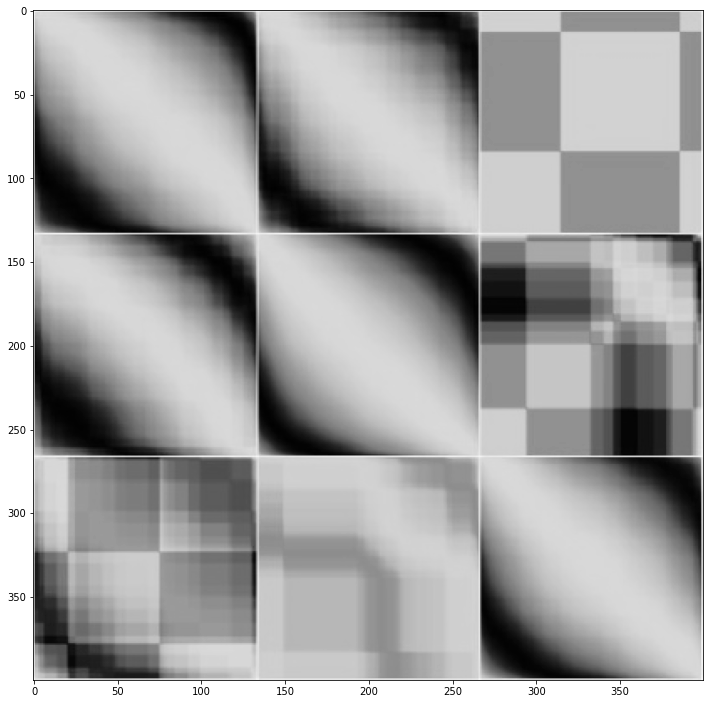

In [517]:
fig, ax = plt.subplots(figsize=(12,20))

for cent in range(len(kmeans_centroids)):
    plt.subplot(1,1, cent+1)
    plt.imshow(kmeans_centroids[cent].reshape(400,400), cmap = 'Greys')